In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

#let's read csv file

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/IMDb Movies India.csv' , encoding='latin1')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.shape

(15509, 10)

#Preproces data

In [6]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
#check for null values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
#Eliminate missing  values
df.dropna(inplace=True)

In [12]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [14]:
df.shape

(5659, 10)

In [15]:
#Converting votes into integer
df['Votes'] = df['Votes'].str.replace(',','').astype('int')

In [16]:
#converting the year column into integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [17]:
#remove the string min from the column
df['Duration'] = df['Duration'].str.strip('min')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


In [19]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


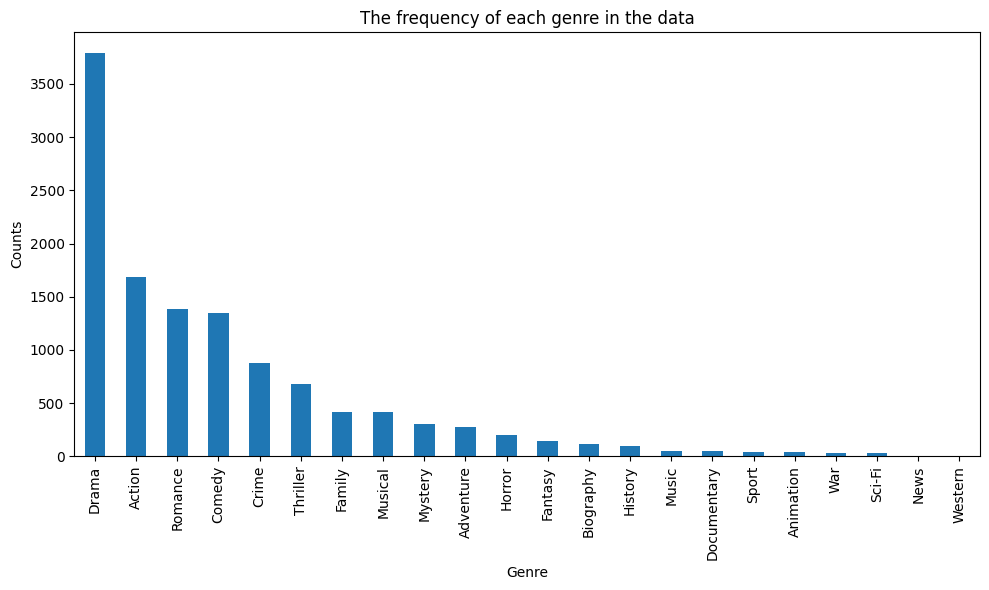

In [21]:

# Step 1: Split genres and count occurrences
movies_genre = df['Genre'].str.split(', ', expand=True).stack().value_counts()

# Step 2: Create a DataFrame from the value counts
genre_counts = pd.DataFrame({'Genre': movies_genre.index, 'Counts': movies_genre.values})

# Step 3: Plotting using pandas
ax = genre_counts.plot(kind='bar', x='Genre', y='Counts', figsize=(10, 6), rot=90,
                       title='The frequency of each genre in the data', legend=False)
ax.set_xlabel('Genre')
ax.set_ylabel('Counts')
ax.get_figure().tight_layout()  # Adjust layout for better appearance
ax.figure.show()

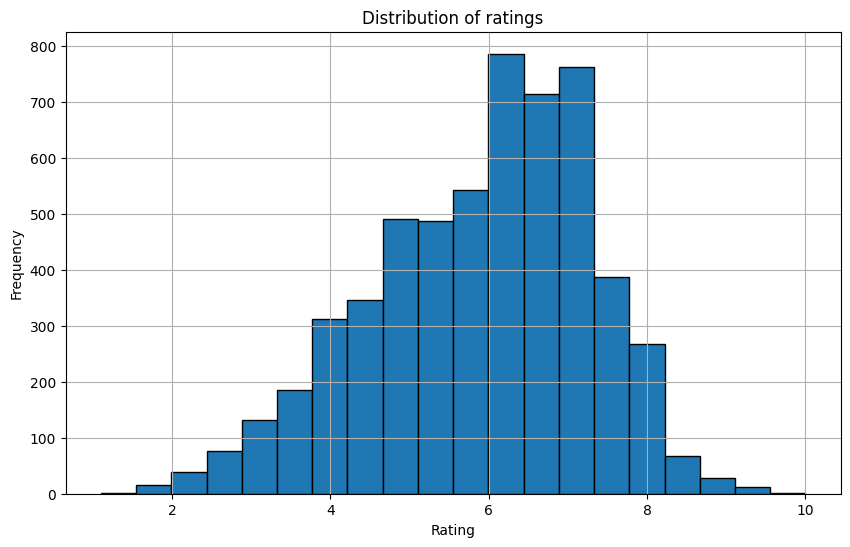

In [23]:
# Plotting the distribution of ratings using pandas
ax = df['Rating'].plot.hist(figsize=(10, 6), bins=20, edgecolor='black')
ax.set_title('Distribution of ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.grid(True)  # Add gridlines for better readability

In [25]:
#Encod the column to use them in the model:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


In [27]:
df = df.drop('Name',axis=1)

In [28]:
df.corr()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,1.000000,-0.327567,-0.049961,-0.204642,0.129749,0.028827,-0.011155,-0.060128,-0.008812
Duration,-0.327567,1.000000,-0.183038,0.001839,0.097621,0.017059,-0.022942,0.002457,-0.013043
Genre,-0.049961,-0.183038,1.000000,0.121796,-0.068755,-0.017921,0.042745,0.028168,0.007474
Rating,-0.204642,0.001839,0.121796,1.000000,0.142563,-0.006824,0.023430,0.041353,0.042413
Votes,0.129749,0.097621,-0.068755,0.142563,1.000000,-0.009418,-0.029895,-0.030963,-0.004919
Director,0.028827,0.017059,-0.017921,-0.006824,-0.009418,1.000000,0.022918,0.018039,0.017915
Actor 1,-0.011155,-0.022942,0.042745,0.023430,-0.029895,0.022918,1.000000,-0.000642,0.013170
Actor 2,-0.060128,0.002457,0.028168,0.041353,-0.030963,0.018039,-0.000642,1.000000,0.010439
Actor 3,-0.008812,-0.013043,0.007474,0.042413,-0.004919,0.017915,0.013170,0.010439,1.000000


# Split the data into training and test sets

In [33]:
from sklearn.model_selection import train_test_split
#split the data

X = df.drop('Rating',axis=1)
y= df['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# using LinearRegression

In [35]:
from sklearn.linear_model import  LinearRegression

In [36]:
#initialoze the model
model_linear = LinearRegression()
#Fiting the training data
model_linear.fit(X_train,y_train)

LinearRegression()

In [38]:
#predict values
y_pred_linear = model_linear.predict(X_test)

In [40]:
model_linear.score(X_test,y_pred_linear)

1.0

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Calculate metrics
r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

print(f'R^2 score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R^2 score: 0.08633120473998979
Mean Squared Error: 1.6737798290839632
Mean Absolute Error: 1.0355603579570465


#using RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Initialize the model (Random Forest Regressor)
model_rf = RandomForestRegressor()

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Predict values using the model
y_pred_rf = model_rf.predict(X_test)

model_rf.score(X_test,y_pred_rf)

1.0

In [49]:
# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'R^2 score (Random Forest): {r2_rf}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

R^2 score (Random Forest): 0.3274010366293163
Mean Squared Error (Random Forest): 1.2321560983510011
Mean Absolute Error (Random Forest): 0.8422620730270906


#using GradientBoostingRegressor

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
# Initialize the model (Gradient Boosting Regressor)
model_gb = GradientBoostingRegressor()

# Fit the model to the training data
model_gb.fit(X_train, y_train)

# Predict values using the model
y_pred_gb = model_gb.predict(X_test)

model_rf.score(X_test,y_pred_gb)


0.8219603785288846

In [53]:
# Calculate metrics
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print(f'R^2 score (Gradient Boosting): {r2_gb}')
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'Mean Absolute Error (Gradient Boosting): {mae_gb}')

R^2 score (Gradient Boosting): 0.34031106601965244
Mean Squared Error (Gradient Boosting): 1.208505792136618
Mean Absolute Error (Gradient Boosting): 0.8398054654963362
